In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [3]:
# Read the data
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)

In [ ]:
# preprocess the data
data = data.sort_values('Date')                             # Sort the data on date
data = data.dropna()                                        # drop null values
data = data.drop_duplicates(subset=['Date'], keep='first')  # drop duplicate values

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
# regularize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

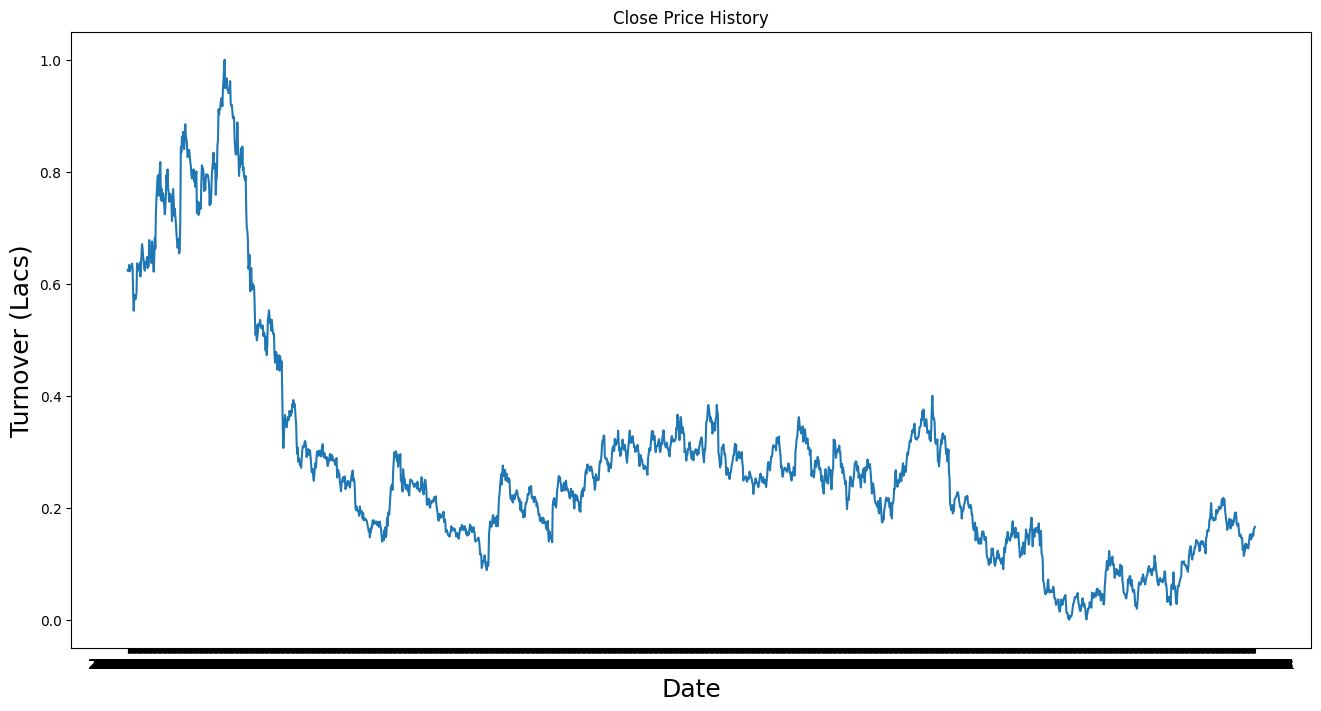

In [8]:
# plot the data
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(data['Date'], scaled_data)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Turnover (Lacs)', fontsize=18)
plt.show()

In [ ]:
# split the data into train and test
train_data_len = int(np.ceil(0.8 * len(scaled_data)))
